# MLAI Week 8: Unsupervised Learning

### Neil D. Lawrence

### 17th November 2015

In [28]:
import pods
import mlai
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Review

* Last time: Looked at Bayesian Regression.
* Introduced priors and marginal likelihoods.
* This time: Unsupervised Learning

### Unsupervised Learning

* Supervised learning is learning where each data has a label (e.g. regression output)
* In unsupervised learning we have no labels for the data.
* Often thought of as structure discovery.
    * Finding features in the data
    * Exploratory data analysis

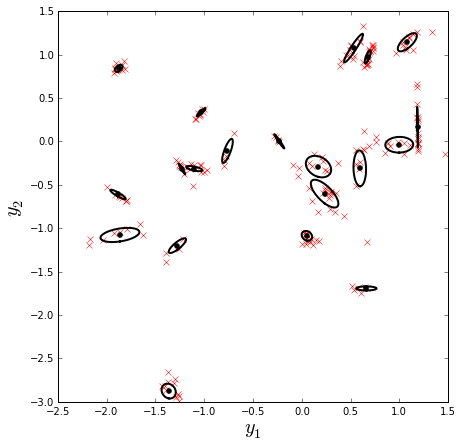

In [29]:
fig, ax = plt.subplots(figsize=(7,7))

num_centres = 20
num_data = 200
centres = np.random.normal(size=(num_centres, 2))
w = np.random.normal(size=(num_centres, 2))*0.1
alloc = np.random.randint(0, num_centres, size=(num_data))
sigma = np.random.normal(size=(num_centres, 1))*0.05
epsilon = np.random.normal(size=(num_data,2))*sigma[alloc, :]

Y = w[alloc, :]*np.random.normal(size=(num_data, 1)) + centres[alloc, :] + epsilon

ax.plot(Y[:, 0], Y[:, 1], 'rx')
ax.set_xlabel('$y_1$', fontsize=20)
ax.set_ylabel('$y_2$', fontsize=20)

plt.savefig('./diagrams/cluster_data0.svg')
pi_vals = np.linspace(-np.pi, np.pi, 200)[:, None]
for i in range(num_centres):
    ax.plot(centres[i, 0], centres[i, 1], 'o', markersize=5, color=[0, 0, 0], linewidth=2)
    x = np.hstack([np.sin(pi_vals), np.cos(pi_vals)])
    L = np.linalg.cholesky(np.outer(w[i, :],w[i, :]) + sigma[i]**2*np.eye(2))
    el = np.dot(x, L.T)
    ax.plot(centres[i, 0] + el[:, 0], centres[i, 1] + el[:, 1], linewidth=2, color=[0,0,0])
plt.savefig('./diagrams/cluster_data1.svg')    

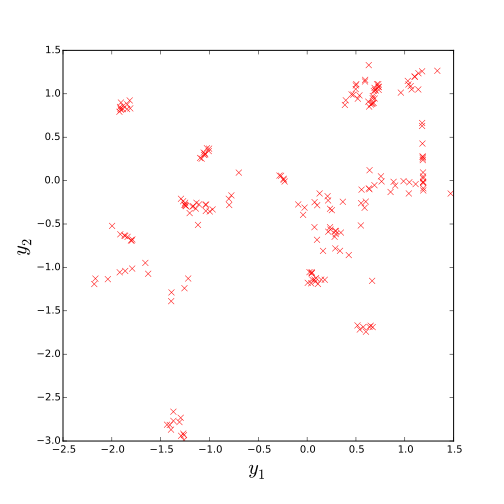

In [30]:
pods.notebook.display_plots('cluster_data{counter}.svg', directory='./diagrams', counter=(0, 1))


### Clustering

* One common approach, not deeply covered in this course. 
* Associate each data point, $\mathbf{y}_{i, :}$ with one of $k$ different discrete groups.
* For example:
    * Clustering animals into discrete groups. Are animals discrete or continuous?
    * Clustering into different different *political* affiliations.
* Humans do seem to like clusters:
    * Very useful when interacting with biologists.
* Subtle difference between clustering and *vector quantisation*


### Trying to Teach About Infinity

* Little anecdote.

### Clustering and Vector Quantisation

* To my mind difference is in clustering there should be a reduction in data density between samples.
* This definition is not universally applied.
* For today's purposes we merge them:
    * Determine how to allocate each point to a group and *harder* total number of groups.

### $k$-means Clustering

* Simple algorithm for allocating points to groups. 
* *Require*: Set of $k$ cluster centres & assignment of each points to a cluster.
    1. Initialize cluster centres as randomly selected data points.
    2. Assign each data point to *nearest* cluster centre.
    3. Update each cluster centre by setting it to the mean of assigned data points.
    4. Repeat 2 and 3 until cluster allocations do not change.

### Objective Function

* This minimizes the objective
  $$
    E=\sum_{j=1}^K \sum_{i\ \text{allocated to}\ j}  \left(\mathbf{y}_{i, :} - \boldsymbol{\mu}_{j, :}\right)^\top\left(\mathbf{y}_{i, :} - \boldsymbol{\mu}_{j, :}\right)
  $$
  *i.e.* it minimizes thesum of Euclidean squared distances betwen points and their associated centres.
* The minimum is *not* guaranteed to be *global* or *unique*.
* This objective is a non-convex optimization problem.

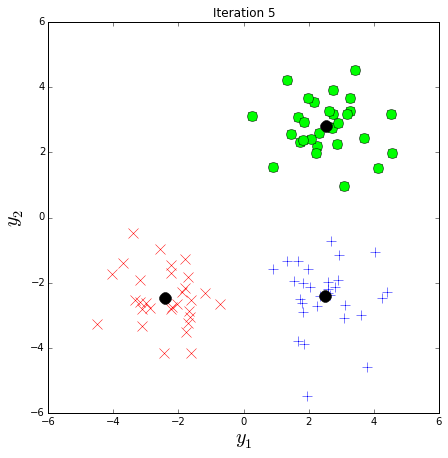

In [31]:
def write_plot(counter, caption):
    filebase = './diagrams/kmeans_clustering_'+str(counter)
    plt.savefig(filebase + '.svg')
    f = open(filebase + '.tex', 'w')
    f.write(caption)
    f.close()
    
fig, ax = plt.subplots(figsize=(7,7))
fontsize = 20

num_clust_points = 30

Y = np.vstack([np.random.normal(size=(num_clust_points, 2)) + 2.5,
       np.random.normal(size=(num_clust_points, 2)) - 2.5,
       np.random.normal(size=(num_clust_points, 2)) + np.array([2.5, -2.5])])

centre_inds = np.random.permutation(Y.shape[0])[:3]
centres = Y[centre_inds, :]

ax.cla()

ax.plot(Y[:, 0], Y[:, 1], '.', color=[0, 0, 0], markersize=10)
ax.set_xlabel('$y_1$')
ax.set_ylabel('$y_2$')
ax.set_title('Data')
counter=0
write_plot(counter, 'Data set to be analyzed. Initialize cluster centres.')
ax.plot(centres[:, 0], centres[:, 1], 'o', color=[0,0,0], linewidth=3, markersize=12)    
counter+=1
write_plot(counter, 'Allocate each point to the cluster with the nearest centre')
i = 0

for i in range(6):
    dist_mat = ((Y[:, :, None] - centres.T[None, :, :])**2).sum(1)
    ind = dist_mat.argmin(1)
    ax.cla()
    ax.plot(Y[ind==0, 0], Y[ind==0, 1], 'x', color= [1, 0, 0], markersize=10)
    ax.plot(Y[ind==1, 0], Y[ind==1, 1], 'o', color=[0, 1, 0], markersize=10)
    ax.plot(Y[ind==2, 0], Y[ind==2, 1], '+', color=[0, 0, 1], markersize=10)
    c = ax.plot(centres[:, 0], centres[:, 1], 'o', color=[0,0, 0], markersize=12, linewidth=3)
    ax.set_xlabel('$y_1$',fontsize=fontsize)
    ax.set_ylabel('$y_2$',fontsize=fontsize)
    ax.set_title('Iteration ' + str(i))
    counter+=1
    write_plot(counter, 'Update each centre by setting to the mean of the allocated points.')
    for j in range(centres.shape[0]):
          centres[j, :] = np.mean(Y[ind==j, :], 0)
    c[0].set_data(centres[:, 0], centres[:, 1])
    counter+=1
    plt.savefig('./diagrams/kmeans_clustering_' + str(counter) + '.svg')
    write_plot(counter, 'Allocate each data point to the nearest cluster centre.')




<IPython.core.display.Latex object>

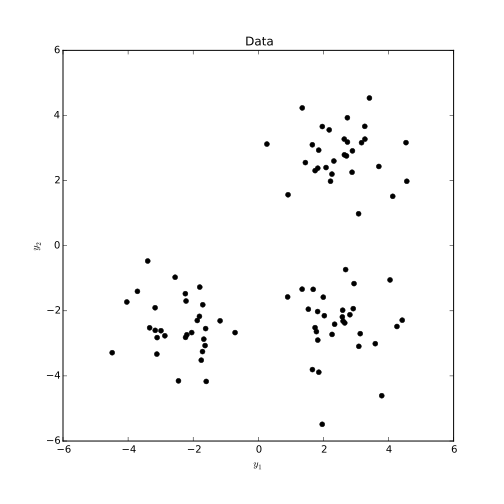

In [32]:
pods.notebook.display_plots('kmeans_clustering_{counter}.svg', directory='./diagrams', text_top='kmeans_clustering_{counter}.tex', counter=(0, 13))

### Other Clustering Approaches

* Spectral clustering (@Shi:normalized00,@Ng:spectral02)
    * Allows clusters which aren't convex hulls.
* Dirichlet process
    * A probabilistic formulation for a clustering algorithm that is *non-parametric*. 
    * Loosely speaking it allows infinite clusters
    * In practice useful for dealing with previously unknown species (e.g. a "Black Swan Event").

### High Dimensional Data

* USPS Data Set Handwritten Digit
* 3648 dimensions (64 rows, 57 columns)
* Space contains much more than just this digit.

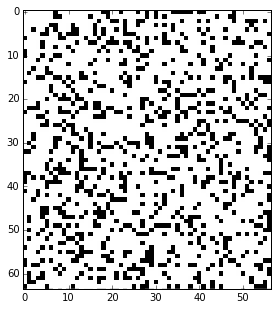

In [35]:
fig, ax = plt.subplots(figsize=(5,5))

six_image = mlai.load_pgm('br1561_6.3.pgm', directory ='./diagrams')
rows = six_image.shape[0]
col = six_image.shape[1]
      
ax.imshow(six_image,interpolation='none').set_cmap('gray')
plt.savefig('./diagrams/dem_six0.png')
for i in range(3):
    rand_image = np.random.rand(rows, col)<((six_image>0).sum()/float(rows*col))
    ax.imshow(rand_image,interpolation='none').set_cmap('gray')
    plt.savefig('./diagrams/dem_six' + str(i+1) + '.png')

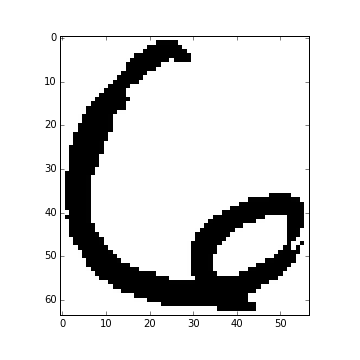

In [36]:
pods.notebook.display_plots('dem_six{counter}.png', directory='./diagrams', counter=(0, 3))

### USPS Samples

* Even if we sample every nanonsecond from now until end of universe you won't see original six!

### Simple Model of Digit
* Rotate a prototype

### Low Dimensional Manifolds

* Pure rotation is too simple
    * In practice data may undergo several distortions.
* For high dimensional data with *structure*:
    * We expect fewer distortions than dimensions;
    * Therefore we expect the data to live on a lower dimensional manifold.
    * Conclusion: Deal with high dimensional data by looking for a lower dimensional non-linear embedding.
    

### Principal Component Analysis

* PCA (@Hotelling:analysis33) is a linear embedding.
* Today its presented as:
    * Rotate to find 'directions' in data with maximal variance.
    * How do we find these directions?
* Algorithmically we do this by diagonalizing the sample covariance matrix 
    $$
    \mathbf{S}=\frac{1}{n}\sum_{i=1}^n \left(\mathbf{y}_{i, :}-\boldsymbol{\mu}\right)\left(\mathbf{y}_{i, :} - \boldsymbol{\mu}\right)^\top
    $$

### Principal Component Analysis

* Find directions in the data, $\mathbf{x} = \mathbf{U}\mathbf{y}$, for which variance is maximized.

### Lagrangian

* Solution is found via constrained optimisation (which uses [Lagrange multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier)): 
  $$
    L\left(\mathbf{u}_{1},\lambda_{1}\right)=\mathbf{u}_{1}^{\top}\mathbf{S}\mathbf{u}_{1}+\lambda_{1}\left(1-\mathbf{u}_{1}^{\top}\mathbf{u}_{1}\right)
  $$

* Gradient with respect to $\mathbf{u}_{1}$ 
  $$\frac{\text{d}L\left(\mathbf{u}_{1},\lambda_{1}\right)}{\text{d}\mathbf{u}_{1}}=2\mathbf{S}\mathbf{u}_{1}-2\lambda_{1}\mathbf{u}_{1}$$
rearrange to form
$$\mathbf{S}\mathbf{u}_{1}=\lambda_{1}\mathbf{u}_{1}.$$
  Which is known as an [*eigenvalue problem*](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors).
  
* Further directions that are *orthogonal* to the first can also be shown to be eigenvectors of the covariance.


### Linear Dimensionality Reduction

* Represent data, $\mathbf{Y}$, with a lower dimensional set of latent
    variables $\mathbf{X}$.
* Assume a linear relationship of the form
  $$ \mathbf{y}_{i,:}=\mathbf{W}\mathbf{x}_{i,:}+\boldsymbol{\epsilon}_{i,:},
  $$
  where
  $$
  \boldsymbol{\epsilon}_{i,:} \sim \mathcal{N}(\mathbf{0}, \sigma^2\mathbf{I})
  $$

### Linear Latent Variable Model
**Probabilistic PCA**

* Define *linear-Gaussian relationship* between latent variables and data.
* **Standard** Latent variable approach:
  * Define Gaussian prior over *latent space*, $\mathbf{X}$.
  * Integrate out *latent variables*.
    

\begin{tikzpicture}
          
          % Define nodes
          \node[obs]                               (Y) {$\dataMatrix$};
          \node[const, above=of Y, xshift=-1.2cm] (W) {$\mappingMatrix$};
          \node[latent, above=of Y, xshift=1.2cm]  (X) {$\latentMatrix$};
          \node[const, right=1cm of Y]            (sigma) {$\dataStd^2$};
          
          % Connect the nodes
          \edge {X,W,sigma} {Y} ; %
          
        \end{tikzpicture}
    
    

$$p\left(\mathbf{Y}|\mathbf{X},\mathbf{W}\right)=\prod_{i=1}^{n}\mathcal{N}\left(\mathbf{y}_{i,:}|\mathbf{W}\mathbf{x}_{i,:}, \sigma^2\mathbf{I}\right)$$

$$p\left(\mathbf{X}\right)=\prod_{i=1}^{n}\mathcal{N}\left(\mathbf{x}_{i,:}|\mathbf{0},\mathbf{I}\right)$$

$$p\left(\mathbf{Y}|\mathbf{W}\right)=\prod_{i=1}^{n}\mathcal{N}\left(\mathbf{y}_{i,:}|\mathbf{0},\mathbf{W}\mathbf{W}^{\top}+\sigma^{2}\mathbf{I}\right)$$

### Computation of the Marginal Likelihood

$$\mathbf{y}_{i,:}=\mathbf{W}\mathbf{x}_{i,:}+\boldsymbol{\epsilon}_{i,:},\quad
\mathbf{x}_{i,:} \sim \mathcal{N}(\mathbf{0},\mathbf{I}), \quad
\boldsymbol{\epsilon}_{i,:} \sim \mathcal{N}(\mathbf{0},\sigma^{2}\mathbf{I})$$

$$\mathbf{W}\mathbf{x}_{i,:} \sim \mathcal{N}(\mathbf{0},\mathbf{W}\mathbf{W}^\top)$$

$$\mathbf{W}\mathbf{x}_{i, :} + \boldsymbol{\epsilon}_{i, :} \sim \mathcal{N}\left(\mathbf{0},\mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}\right)$$

### Linear Latent Variable Model II
  **Probabilistic PCA Max. Likelihood Soln** (@Tipping:probpca99)
  
   

 %\includegraphics<1>[width=0.25\textwidth]{../../../gplvm/tex/diagrams/ppcaGraph}
    \begin{tikzpicture}
        
      % Define nodes
      \node[obs]                               (Y) {$\dataMatrix$};
      \node[const, above=of Y] (W) {$\mappingMatrix$};
      \node[const, right=1cm of Y]            (sigma) {$\dataStd^2$};
      
      % Connect the nodes
      \edge {W,sigma} {Y} ; %
    \end{tikzpicture}

$$p\left(\mathbf{Y}|\mathbf{W}\right)=\prod_{i=1}^{n}\mathcal{N}\left(\mathbf{y}_{i, :}|\mathbf{0}, \mathbf{W}\mathbf{W}^{\top}+\sigma^{2}\mathbf{I}\right)$$

### Linear Latent Variable Model II
  
**Probabilistic PCA Max. Likelihood Soln** (@Tipping:probpca99)
  $$  p\left(\mathbf{Y}|\mathbf{W}\right)=\prod_{i=1}^{n}\mathcal{N}\left(\mathbf{y}_{i,:}|\mathbf{0},\mathbf{C}\right),\quad \mathbf{C}=\mathbf{W}\mathbf{W}^{\top}+\sigma^{2}\mathbf{I}
  $$
  $$
    \log p\left(\mathbf{Y}|\mathbf{W}\right)=-\frac{n}{2}\log\left|\mathbf{C}\right|-\frac{1}{2}\text{tr}\left(\mathbf{C}^{-1}\mathbf{Y}^{\top}\mathbf{Y}\right)+\text{const.}
  $$
  If $\mathbf{U}_{q}$ are first $q$ principal eigenvectors of $n^{-1}\mathbf{Y}^{\top}\mathbf{Y}$
  and the corresponding eigenvalues are $\boldsymbol{\Lambda}_{q}$,
  $$
 \mathbf{W}=\mathbf{U}_{q}\mathbf{L}\mathbf{R}^{\top},\quad\mathbf{L}=\left(\boldsymbol{\Lambda}_{q}-\sigma^{2}\mathbf{I}\right)^{\frac{1}{2}}
  $$
    where $\mathbf{R}$ is an arbitrary rotation matrix.


### Reading

-   Chapter 7 of @Rogers:book11 up to pg 249.